# Coin Change (LeetCode 322)

## Problem

You are given an integer array `coins` representing coin denominations and an integer `amount` representing a total amount of money.

Return the **fewest number of coins** needed to make up that amount. If that amount cannot be made up by any combination of the coins, return `-1`.

You may assume you have an **infinite supply** of each coin denomination.

### Input / Output
- **Input:** `coins: List[int]`, `amount: int`
- **Output:** `int` — minimum number of coins, or `-1` if impossible

### Constraints
- `1 <= coins.length <= 12`
- `1 <= coins[i] <= 2^31 - 1`
- `0 <= amount <= 10^4`

### Examples

| coins | amount | output | explanation |
|---|---|---|---|
| [1, 5, 10] | 11 | 3 | 10 + 1 |
| [2] | 3 | -1 | can't make 3 with only 2s |
| [1] | 0 | 0 | no coins needed |

## Intuition

### The "aha" moment

Think of it like making change at a vending machine. You want to use as few coins as possible. The key insight is: **the minimum coins for amount `n` depends on the minimum coins for smaller amounts**.

If you have coins `[1, 5, 10]` and need to make 11:
- Use a 1-coin → now solve for 10 (which takes 1 coin) → total 2 coins
- Use a 5-coin → now solve for 6 (which takes 2 coins: 5+1) → total 3 coins  
- Use a 10-coin → now solve for 1 (which takes 1 coin) → total 2 coins

Pick the minimum! This is **optimal substructure** — the hallmark of dynamic programming.

The recurrence: `dp[amount] = min(dp[amount - coin] + 1)` for each coin.

### Common wrong approaches

**1. Greedy (always pick the largest coin first)**
- What it tries: Sort coins descending, greedily pick the biggest coin that fits.
- Why it seems reasonable: In US currency (1, 5, 10, 25), greedy actually works. You'd always pick quarters first.
- Why it fails: With coins `[1, 3, 4]` and amount `6`: greedy picks `4+1+1 = 3 coins`, but optimal is `3+3 = 2 coins`. The greedy choice locks you into a suboptimal path.

**2. Brute-force recursion without memoization**
- What it tries: Recursively try every coin at every step, explore all combinations.
- Why it seems reasonable: It correctly explores all possibilities and finds the true minimum.
- Why it fails: TLE. The recursion tree has exponential branching — `O(amount^n)` where `n` is the number of coins. For `amount=10000` with 12 coins, this is astronomical. Many subproblems are solved repeatedly.

**3. BFS treating each amount as a node**
- What it tries: Start at `amount`, subtract each coin to get neighbors, BFS until reaching 0.
- Why it seems reasonable: BFS finds shortest path, and "fewest coins" = shortest path.
- Why it fails: It actually *works* but uses `O(amount × coins)` time and can use more memory than DP due to the queue. It's a valid approach but DP is more standard and space-efficient.

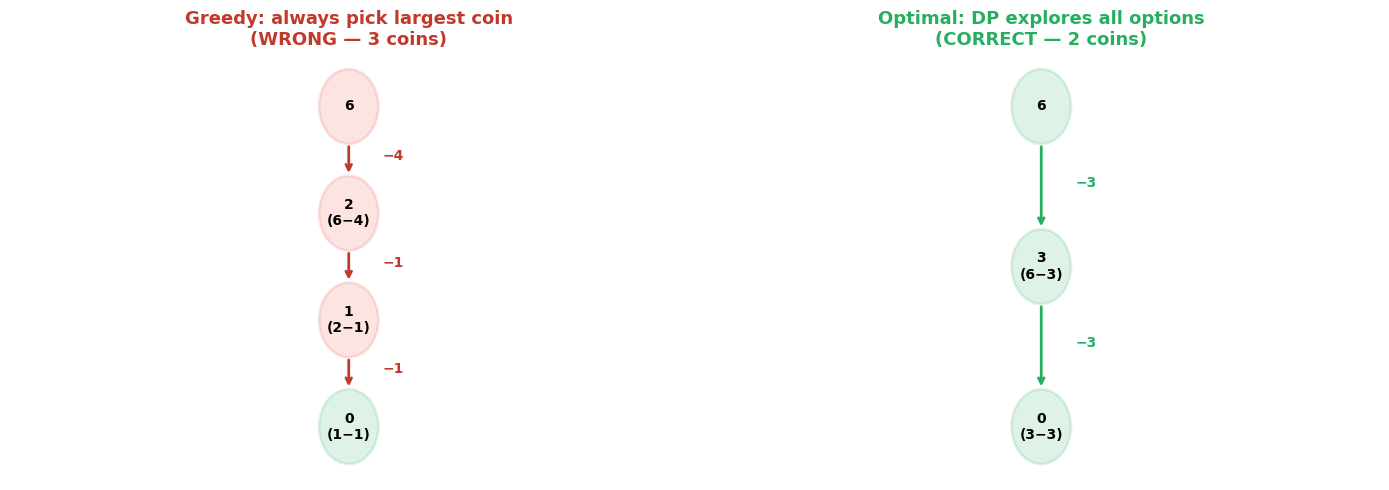

coins = [1, 3, 4], amount = 6
Greedy picks 4 → 1 → 1 = 3 coins ❌
Optimal picks 3 → 3     = 2 coins ✅


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Visualize WHY greedy fails: decision tree for coins=[1,3,4], amount=6
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Greedy path (wrong)
ax = axes[0]
ax.set_xlim(-1, 7)
ax.set_ylim(-0.5, 3.5)
ax.set_title("Greedy: always pick largest coin\n(WRONG — 3 coins)", fontsize=13, fontweight='bold', color='#c0392b')
ax.axis('off')

greedy_nodes = [(3, 3, '6'), (3, 2, '2\n(6−4)'), (3, 1, '1\n(2−1)'), (3, 0, '0\n(1−1)')]
greedy_edges = [('4', 0), ('1', 1), ('1', 2)]
for i, (x, y, label) in enumerate(greedy_nodes):
    color = '#e74c3c' if i < 3 else '#27ae60'
    circle = plt.Circle((x, y), 0.35, color=color, alpha=0.15, ec=color, lw=2)
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')
for i, (coin_label, idx) in enumerate(greedy_edges):
    x1, y1 = greedy_nodes[idx][0], greedy_nodes[idx][1] - 0.35
    x2, y2 = greedy_nodes[idx+1][0], greedy_nodes[idx+1][1] + 0.35
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', color='#c0392b', lw=2))
    ax.text(x1 + 0.4, (y1+y2)/2, f'−{coin_label}', fontsize=10, color='#c0392b', fontweight='bold')

# Right: Optimal path (DP finds this)
ax = axes[1]
ax.set_xlim(-1, 7)
ax.set_ylim(-0.5, 3.5)
ax.set_title("Optimal: DP explores all options\n(CORRECT — 2 coins)", fontsize=13, fontweight='bold', color='#27ae60')
ax.axis('off')

opt_nodes = [(3, 3, '6'), (3, 1.5, '3\n(6−3)'), (3, 0, '0\n(3−3)')]
opt_edges = [('3', 0), ('3', 1)]
for i, (x, y, label) in enumerate(opt_nodes):
    color = '#27ae60'
    circle = plt.Circle((x, y), 0.35, color=color, alpha=0.15, ec=color, lw=2)
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')
for i, (coin_label, idx) in enumerate(opt_edges):
    x1, y1 = opt_nodes[idx][0], opt_nodes[idx][1] - 0.35
    x2, y2 = opt_nodes[idx+1][0], opt_nodes[idx+1][1] + 0.35
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', color='#27ae60', lw=2))
    ax.text(x1 + 0.4, (y1+y2)/2, f'−{coin_label}', fontsize=10, color='#27ae60', fontweight='bold')

plt.tight_layout()
plt.show()
print("coins = [1, 3, 4], amount = 6")
print("Greedy picks 4 → 1 → 1 = 3 coins ❌")
print("Optimal picks 3 → 3     = 2 coins ✅")

## Approach

We'll show three approaches in progression:

1. **Recursive (brute force)** — correct but exponentially slow
2. **Top-down DP (memoization)** — add caching to eliminate redundant work
3. **Bottom-up DP (tabulation)** — iterative, no recursion overhead, optimal

### Bottom-up DP strategy (the optimal approach)

1. Create array `dp` of size `amount + 1`, initialized to `amount + 1` (a value larger than any valid answer — acts as "infinity")
2. Set `dp[0] = 0` — zero coins needed to make amount 0
3. For each amount `i` from `1` to `amount`:
   - For each coin `c` in `coins`:
     - If `c <= i`, then `dp[i] = min(dp[i], dp[i - c] + 1)`
4. Return `dp[amount]` if it's still reachable, else `-1`

**Why an array?** Each entry `dp[i]` stores the answer to a subproblem ("min coins for amount `i`"). We fill it left-to-right so that when we need `dp[i - c]`, it's already computed.

## Solution 1: Recursive Brute Force

In [2]:
from typing import List

class SolutionBruteForce:
    def coinChange(self, coins: List[int], amount: int) -> int:
        if amount == 0:
            return 0
        if amount < 0:
            return -1
        
        min_coins = float('inf')
        for coin in coins:
            # Try using this coin, then solve the remaining amount
            result = self.coinChange(coins, amount - coin)
            if result != -1:
                min_coins = min(min_coins, result + 1)
        
        return min_coins if min_coins != float('inf') else -1

# Works on small inputs
sol_bf = SolutionBruteForce()
print("Brute force results:")
print(f"  coins=[1,5,10], amount=11 → {sol_bf.coinChange([1,5,10], 11)}")  # 2
print(f"  coins=[2], amount=3       → {sol_bf.coinChange([2], 3)}")          # -1
print(f"  coins=[1], amount=0       → {sol_bf.coinChange([1], 0)}")          # 0
print(f"  coins=[1,3,4], amount=6   → {sol_bf.coinChange([1,3,4], 6)}")     # 2

assert sol_bf.coinChange([1,5,10], 11) == 2
assert sol_bf.coinChange([2], 3) == -1
assert sol_bf.coinChange([1], 0) == 0
assert sol_bf.coinChange([1,3,4], 6) == 2
print("\n✓ All assertions passed")

Brute force results:
  coins=[1,5,10], amount=11 → 2
  coins=[2], amount=3       → -1
  coins=[1], amount=0       → 0
  coins=[1,3,4], amount=6   → 2

✓ All assertions passed


In [3]:
# Walkthrough: trace brute force on coins=[1,3,4], amount=6
# Show the recursive calls to see why it's slow

call_count = 0

def coin_change_traced(coins: List[int], amount: int, depth: int = 0) -> int:
    global call_count
    call_count += 1
    indent = "  " * depth
    
    if amount == 0:
        print(f"{indent}amount=0 → return 0 (base case)")
        return 0
    if amount < 0:
        print(f"{indent}amount={amount} → return -1 (negative)")
        return -1
    
    if depth <= 2:  # Only print first 3 levels to keep output readable
        print(f"{indent}Solving amount={amount}, trying coins {coins}")
    
    min_coins = float('inf')
    for coin in coins:
        result = coin_change_traced(coins, amount - coin, depth + 1)
        if result != -1:
            min_coins = min(min_coins, result + 1)
    
    ans = min_coins if min_coins != float('inf') else -1
    if depth <= 2:
        print(f"{indent}→ amount={amount} needs {ans} coins")
    return ans

print("=== Recursive trace: coins=[1,3,4], amount=6 ===")
print("(showing first 3 levels of recursion)\n")
result = coin_change_traced([1, 3, 4], 6)
print(f"\nResult: {result} coins")
print(f"Total recursive calls: {call_count}")
print("\n→ Notice how amount=3 and amount=2 get solved multiple times!")
print("  This redundancy is what memoization eliminates.")

=== Recursive trace: coins=[1,3,4], amount=6 ===
(showing first 3 levels of recursion)

Solving amount=6, trying coins [1, 3, 4]
  Solving amount=5, trying coins [1, 3, 4]
    Solving amount=4, trying coins [1, 3, 4]
            amount=0 → return 0 (base case)
            amount=-2 → return -1 (negative)
            amount=-3 → return -1 (negative)
          amount=-1 → return -1 (negative)
          amount=-2 → return -1 (negative)
        amount=0 → return 0 (base case)
        amount=-1 → return -1 (negative)
        amount=0 → return 0 (base case)
        amount=-2 → return -1 (negative)
        amount=-3 → return -1 (negative)
      amount=0 → return 0 (base case)
    → amount=4 needs 1 coins
    Solving amount=2, trying coins [1, 3, 4]
        amount=0 → return 0 (base case)
        amount=-2 → return -1 (negative)
        amount=-3 → return -1 (negative)
      amount=-1 → return -1 (negative)
      amount=-2 → return -1 (negative)
    → amount=2 needs 2 coins
    Solving amount=

In [4]:
import time

# Demonstrate WHY brute force is too slow
print("Brute force timing on increasing amounts:")
print(f"{'amount':>8} {'time (s)':>10} {'status':>10}")
print("-" * 30)

for amt in [11, 15, 20, 23]:
    start = time.perf_counter()
    result = sol_bf.coinChange([1, 5, 10], amt)
    elapsed = time.perf_counter() - start
    status = "fast" if elapsed < 0.1 else "slow" if elapsed < 1 else "TLE!"
    print(f"{amt:>8} {elapsed:>10.4f} {status:>10}")

print("\n→ Time grows exponentially. amount=100 would take hours.")
print("  We need memoization or bottom-up DP.")

Brute force timing on increasing amounts:
  amount   time (s)     status
------------------------------
      11     0.0000       fast
      15     0.0001       fast
      20     0.0004       fast
      23     0.0009       fast

→ Time grows exponentially. amount=100 would take hours.
  We need memoization or bottom-up DP.


## Solution 2: Top-Down DP (Memoization)

Same recursion, but cache results so each subproblem is solved only once.

In [5]:
from functools import lru_cache

class SolutionMemo:
    def coinChange(self, coins: List[int], amount: int) -> int:
        @lru_cache(maxsize=None)
        def dp(remaining: int) -> int:
            if remaining == 0:
                return 0
            if remaining < 0:
                return -1
            
            min_coins = float('inf')
            for coin in coins:
                result = dp(remaining - coin)
                if result != -1:
                    min_coins = min(min_coins, result + 1)
            
            return min_coins if min_coins != float('inf') else -1
        
        return dp(amount)

sol_memo = SolutionMemo()
print("Memoized results:")
print(f"  coins=[1,5,10], amount=11   → {sol_memo.coinChange([1,5,10], 11)}")    # 2
print(f"  coins=[2], amount=3          → {sol_memo.coinChange([2], 3)}")           # -1
print(f"  coins=[1], amount=0          → {sol_memo.coinChange([1], 0)}")           # 0
print(f"  coins=[1,3,4], amount=6      → {sol_memo.coinChange([1,3,4], 6)}")      # 2
# Now it handles large inputs easily
print(f"  coins=[1,5,10], amount=1000  → {sol_memo.coinChange([1,5,10], 1000)}")  # 100

assert sol_memo.coinChange([1,5,10], 11) == 2
assert sol_memo.coinChange([2], 3) == -1
assert sol_memo.coinChange([1], 0) == 0
assert sol_memo.coinChange([1,3,4], 6) == 2
assert sol_memo.coinChange([1,5,10], 1000) == 100
print("\n✓ All assertions passed — and it's fast even for amount=1000!")

Memoized results:
  coins=[1,5,10], amount=11   → 2
  coins=[2], amount=3          → -1
  coins=[1], amount=0          → 0
  coins=[1,3,4], amount=6      → 2
  coins=[1,5,10], amount=1000  → 100

✓ All assertions passed — and it's fast even for amount=1000!


In [6]:
# Walkthrough: trace memoized version on coins=[1,3,4], amount=6

def coin_change_memo_traced(coins: List[int], amount: int) -> int:
    memo = {}
    call_count = 0
    cache_hits = 0
    
    def dp(remaining: int, depth: int = 0) -> int:
        nonlocal call_count, cache_hits
        call_count += 1
        indent = "  " * depth
        
        if remaining in memo:
            cache_hits += 1
            print(f"{indent}dp({remaining}) → {memo[remaining]} (CACHED)")
            return memo[remaining]
        
        if remaining == 0:
            print(f"{indent}dp(0) → 0 (base case)")
            return 0
        if remaining < 0:
            return -1
        
        print(f"{indent}dp({remaining}): trying coins {coins}")
        min_coins = float('inf')
        for coin in coins:
            result = dp(remaining - coin, depth + 1)
            if result != -1:
                min_coins = min(min_coins, result + 1)
        
        ans = min_coins if min_coins != float('inf') else -1
        memo[remaining] = ans
        print(f"{indent}→ dp({remaining}) = {ans} (STORED)")
        return ans
    
    result = dp(amount)
    return result, call_count, cache_hits

print("=== Memoized trace: coins=[1,3,4], amount=6 ===\n")
result, calls, hits = coin_change_memo_traced([1, 3, 4], 6)
print(f"\nResult: {result} coins")
print(f"Total calls: {calls}, Cache hits: {hits}")
print("→ Each subproblem computed once, then reused from cache.")

=== Memoized trace: coins=[1,3,4], amount=6 ===

dp(6): trying coins [1, 3, 4]
  dp(5): trying coins [1, 3, 4]
    dp(4): trying coins [1, 3, 4]
      dp(3): trying coins [1, 3, 4]
        dp(2): trying coins [1, 3, 4]
          dp(1): trying coins [1, 3, 4]
            dp(0) → 0 (base case)
          → dp(1) = 1 (STORED)
        → dp(2) = 2 (STORED)
        dp(0) → 0 (base case)
      → dp(3) = 1 (STORED)
      dp(1) → 1 (CACHED)
      dp(0) → 0 (base case)
    → dp(4) = 1 (STORED)
    dp(2) → 2 (CACHED)
    dp(1) → 1 (CACHED)
  → dp(5) = 2 (STORED)
  dp(3) → 1 (CACHED)
  dp(2) → 2 (CACHED)
→ dp(6) = 2 (STORED)

Result: 2 coins
Total calls: 19, Cache hits: 5
→ Each subproblem computed once, then reused from cache.


## Solution 3: Bottom-Up DP (Optimal)

Instead of recursion, fill a table iteratively from `dp[0]` to `dp[amount]`.

In [7]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        # dp[i] = min coins to make amount i
        # Initialize to amount+1 (impossible sentinel — any valid answer is <= amount)
        dp = [amount + 1] * (amount + 1)
        dp[0] = 0  # 0 coins needed to make amount 0
        
        for i in range(1, amount + 1):
            for coin in coins:
                if coin <= i:
                    # Using this coin: 1 + best way to make the remainder
                    dp[i] = min(dp[i], dp[i - coin] + 1)
        
        return dp[amount] if dp[amount] <= amount else -1

sol = Solution()
print("Bottom-up DP results:")
test_cases = [
    ([1, 5, 10], 11, 2),
    ([2], 3, -1),
    ([1], 0, 0),
    ([1, 3, 4], 6, 2),
    ([1, 5, 10], 1000, 100),
    ([186, 419, 83, 408], 6249, 20),
]
for coins, amount, expected in test_cases:
    result = sol.coinChange(coins, amount)
    status = "✓" if result == expected else "✗"
    print(f"  {status} coins={coins}, amount={amount} → {result} (expected {expected})")
    assert result == expected

print("\n✓ All assertions passed")

Bottom-up DP results:
  ✓ coins=[1, 5, 10], amount=11 → 2 (expected 2)
  ✓ coins=[2], amount=3 → -1 (expected -1)
  ✓ coins=[1], amount=0 → 0 (expected 0)
  ✓ coins=[1, 3, 4], amount=6 → 2 (expected 2)
  ✓ coins=[1, 5, 10], amount=1000 → 100 (expected 100)
  ✓ coins=[186, 419, 83, 408], amount=6249 → 20 (expected 20)

✓ All assertions passed


In [8]:
# Walkthrough: trace bottom-up DP on coins=[1,3,4], amount=6
# Print the DP table as it fills

coins = [1, 3, 4]
amount = 6
dp = [amount + 1] * (amount + 1)
dp[0] = 0

print(f"coins = {coins}, amount = {amount}")
print(f"Initial dp: {dp}")
print(f"(sentinel value = {amount + 1}, meaning 'not yet reachable')\n")

for i in range(1, amount + 1):
    choices = []
    for coin in coins:
        if coin <= i:
            prev = dp[i - coin]
            label = f"coin={coin}: dp[{i}-{coin}]+1 = dp[{i-coin}]+1 = {prev}+1 = {prev+1}"
            if prev < amount + 1:
                choices.append((prev + 1, label))
            else:
                choices.append((prev + 1, label + " (unreachable)"))
            dp[i] = min(dp[i], prev + 1)
    
    print(f"dp[{i}]:")
    for _, desc in choices:
        print(f"    {desc}")
    result_str = str(dp[i]) if dp[i] <= amount else "∞"
    print(f"  → dp[{i}] = {result_str}")

print(f"\nFinal dp: {dp}")
print(f"Answer: dp[{amount}] = {dp[amount]} coins")

coins = [1, 3, 4], amount = 6
Initial dp: [0, 7, 7, 7, 7, 7, 7]
(sentinel value = 7, meaning 'not yet reachable')

dp[1]:
    coin=1: dp[1-1]+1 = dp[0]+1 = 0+1 = 1
  → dp[1] = 1
dp[2]:
    coin=1: dp[2-1]+1 = dp[1]+1 = 1+1 = 2
  → dp[2] = 2
dp[3]:
    coin=1: dp[3-1]+1 = dp[2]+1 = 2+1 = 3
    coin=3: dp[3-3]+1 = dp[0]+1 = 0+1 = 1
  → dp[3] = 1
dp[4]:
    coin=1: dp[4-1]+1 = dp[3]+1 = 1+1 = 2
    coin=3: dp[4-3]+1 = dp[1]+1 = 1+1 = 2
    coin=4: dp[4-4]+1 = dp[0]+1 = 0+1 = 1
  → dp[4] = 1
dp[5]:
    coin=1: dp[5-1]+1 = dp[4]+1 = 1+1 = 2
    coin=3: dp[5-3]+1 = dp[2]+1 = 2+1 = 3
    coin=4: dp[5-4]+1 = dp[1]+1 = 1+1 = 2
  → dp[5] = 2
dp[6]:
    coin=1: dp[6-1]+1 = dp[5]+1 = 2+1 = 3
    coin=3: dp[6-3]+1 = dp[3]+1 = 1+1 = 2
    coin=4: dp[6-4]+1 = dp[2]+1 = 2+1 = 3
  → dp[6] = 2

Final dp: [0, 1, 2, 1, 1, 2, 2]
Answer: dp[6] = 2 coins


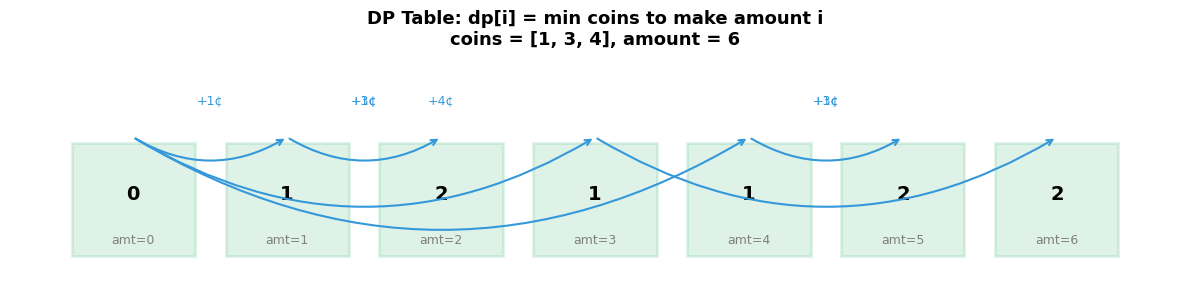

Coins used: 3 + 3 = 6


In [9]:
# Visualize the DP table fill for coins=[1,3,4], amount=6

coins = [1, 3, 4]
amount = 6
dp = [amount + 1] * (amount + 1)
dp[0] = 0

# Record which coin was used at each step
used_coin = [None] * (amount + 1)

for i in range(1, amount + 1):
    for coin in coins:
        if coin <= i and dp[i - coin] + 1 < dp[i]:
            dp[i] = dp[i - coin] + 1
            used_coin[i] = coin

fig, ax = plt.subplots(figsize=(12, 3))

for i in range(amount + 1):
    val = dp[i] if dp[i] <= amount else '∞'
    color = '#27ae60' if dp[i] <= amount else '#e74c3c'
    rect = plt.Rectangle((i - 0.4, 0), 0.8, 1, facecolor=color, alpha=0.15, edgecolor=color, lw=2)
    ax.add_patch(rect)
    ax.text(i, 0.55, str(val), ha='center', va='center', fontsize=14, fontweight='bold')
    ax.text(i, 0.15, f'amt={i}', ha='center', va='center', fontsize=9, color='gray')
    
    # Draw arrow from dp[i-coin] to dp[i] showing which coin was used
    if used_coin[i] is not None:
        src = i - used_coin[i]
        ax.annotate('', xy=(i, 1.05), xytext=(src, 1.05),
                    arrowprops=dict(arrowstyle='->', color='#3498db', lw=1.5,
                                   connectionstyle='arc3,rad=0.3'))
        ax.text((i + src) / 2, 1.35, f'+{used_coin[i]}¢', ha='center', fontsize=9, color='#3498db')

ax.set_xlim(-0.8, amount + 0.8)
ax.set_ylim(-0.2, 1.8)
ax.set_title('DP Table: dp[i] = min coins to make amount i\ncoins = [1, 3, 4], amount = 6',
             fontsize=13, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

# Reconstruct the solution path
path = []
remaining = amount
while remaining > 0:
    path.append(used_coin[remaining])
    remaining -= used_coin[remaining]
print(f"Coins used: {' + '.join(map(str, path))} = {amount}")

## Benchmark

Let's see the exponential vs polynomial difference in practice.

coins = [1, 5, 10, 25]

 Brute Force    amount    time (s)
-----------------------------------
                    10    0.000016
                    15    0.000056
                    18    0.000325
                    20    0.000246
                    22    0.000466

Bottom-up DP    amount    time (s)
-----------------------------------
                    10    0.000006
                    50    0.000022
                   100    0.000043
                   500    0.000385
                  1000    0.000579
                  5000    0.002400
                 10000    0.005173


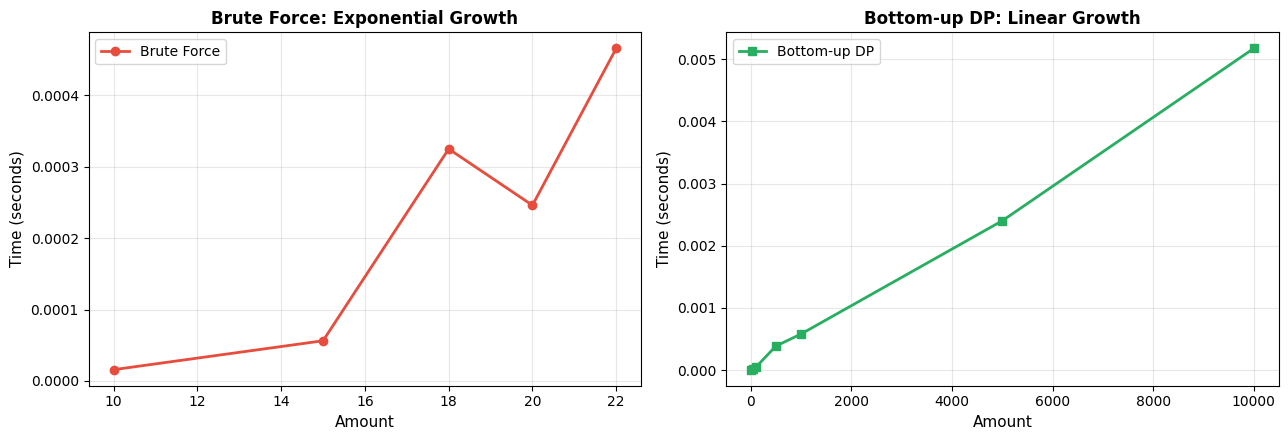


→ Brute force can't even handle amount=25 in reasonable time.
  DP handles amount=10000 in milliseconds.


In [10]:
import time

# Benchmark: brute force vs memoized vs bottom-up
# Brute force only on small amounts (it's too slow otherwise)
coins = [1, 5, 10, 25]

# Brute force on small inputs
bf_amounts = [10, 15, 18, 20, 22]
bf_times = []
for amt in bf_amounts:
    start = time.perf_counter()
    sol_bf.coinChange(coins, amt)
    bf_times.append(time.perf_counter() - start)

# Bottom-up DP on all sizes
dp_amounts = [10, 50, 100, 500, 1000, 5000, 10000]
dp_times = []
for amt in dp_amounts:
    start = time.perf_counter()
    sol.coinChange(coins, amt)
    dp_times.append(time.perf_counter() - start)

print(f"coins = {coins}")
print(f"\n{'Brute Force':>12}  {'amount':>8}  {'time (s)':>10}")
print("-" * 35)
for amt, t in zip(bf_amounts, bf_times):
    print(f"{'':>12}  {amt:>8}  {t:>10.6f}")

print(f"\n{'Bottom-up DP':>12}  {'amount':>8}  {'time (s)':>10}")
print("-" * 35)
for amt, t in zip(dp_amounts, dp_times):
    print(f"{'':>12}  {amt:>8}  {t:>10.6f}")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4.5))

ax1.plot(bf_amounts, bf_times, 'o-', color='#e74c3c', linewidth=2, markersize=6, label='Brute Force')
ax1.set_xlabel('Amount', fontsize=11)
ax1.set_ylabel('Time (seconds)', fontsize=11)
ax1.set_title('Brute Force: Exponential Growth', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(dp_amounts, dp_times, 's-', color='#27ae60', linewidth=2, markersize=6, label='Bottom-up DP')
ax2.set_xlabel('Amount', fontsize=11)
ax2.set_ylabel('Time (seconds)', fontsize=11)
ax2.set_title('Bottom-up DP: Linear Growth', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n→ Brute force can't even handle amount=25 in reasonable time.")
print("  DP handles amount=10000 in milliseconds.")

## Complexity Analysis

### Bottom-up DP (optimal)

**Time: O(amount × len(coins))**
- Outer loop runs `amount` times
- Inner loop runs `len(coins)` times
- Each iteration does O(1) work (comparison and min)
- For the given constraints: O(10^4 × 12) = O(120,000) — very fast

**Space: O(amount)**
- The `dp` array has `amount + 1` entries
- No recursion stack

### Top-down memoization
- Same time complexity O(amount × coins) but with recursion overhead
- Space is O(amount) for memo + O(amount) for recursion stack in worst case

### Brute force
- Time: O(len(coins)^amount) — exponential, each level branches by number of coins
- Space: O(amount) for recursion stack

## Edge Cases & Follow-ups

In [11]:
sol = Solution()

# Edge case 1: amount = 0
assert sol.coinChange([1, 2, 5], 0) == 0, "Zero amount needs zero coins"

# Edge case 2: impossible (no way to make the amount)
assert sol.coinChange([2], 3) == -1, "Can't make odd amount with only even coins"

# Edge case 3: single coin denomination
assert sol.coinChange([3], 9) == 3, "9 / 3 = 3 coins"
assert sol.coinChange([3], 10) == -1, "10 not divisible by 3"

# Edge case 4: amount equals a single coin
assert sol.coinChange([1, 5, 10], 5) == 1, "Exact coin match"

# Edge case 5: coin larger than amount
assert sol.coinChange([5], 3) == -1, "All coins too large"

# Edge case 6: large amount, coin=1 guarantees solution
assert sol.coinChange([1, 5, 10, 25], 10000) == 400, "10000 / 25 = 400"

# Edge case 7: greedy would fail
assert sol.coinChange([1, 3, 4], 6) == 2, "3+3, not 4+1+1"

print("Edge case results:")
print("  ✓ amount=0 → 0")
print("  ✓ impossible → -1")
print("  ✓ single denomination")
print("  ✓ exact coin match → 1")
print("  ✓ all coins too large → -1")
print("  ✓ large amount with coin=1")
print("  ✓ greedy-fails case")
print("\n✓ All edge cases passed")

Edge case results:
  ✓ amount=0 → 0
  ✓ impossible → -1
  ✓ single denomination
  ✓ exact coin match → 1
  ✓ all coins too large → -1
  ✓ large amount with coin=1
  ✓ greedy-fails case

✓ All edge cases passed


### Follow-ups

- **"What if you need to return the actual coins used?"** — Track a `parent` array alongside `dp`, recording which coin was used at each step. Backtrack from `dp[amount]`.
- **"What if each coin can only be used once?"** — That's the 0/1 knapsack variant. Process coins in the outer loop and amounts in reverse in the inner loop.
- **"What if you need to count the number of ways (not minimum coins)?"** — That's LeetCode 518 (Coin Change II). Change `min` to `sum`: `dp[i] += dp[i - coin]`.

## Pattern & Generalization

### Pattern: Unbounded Knapsack / Min-Cost DP

Coin Change belongs to the **unbounded knapsack** family — you have unlimited items of each type and want to optimize a quantity (here, minimize count) subject to a capacity constraint (the amount).

**When to recognize this pattern:**
- You're asked for min/max of something
- You can reuse items (unlimited supply)
- The problem has a clear "remaining capacity" dimension
- Greedy doesn't work (no greedy-choice property)

**When this pattern seems applicable but doesn't work:**

1. **Counting distinct combinations (not permutations):** If asked "how many ways can you make change?" and order doesn't matter (`1+5` = `5+1`), you can't just do `dp[i] += dp[i-coin]` with coins in the inner loop — that counts permutations. You need coins in the outer loop to avoid duplicates. This trips up many candidates on LeetCode 518 vs 377.

2. **When items have dependencies or ordering constraints:** If using item A requires first using item B, the flat DP table breaks down. You'd need a graph/topological approach instead (e.g., course scheduling problems).

### Where this shows up outside interviews

- **Resource allocation**: Allocating fixed-size memory pages, network bandwidth slots
- **Currency systems**: ATM dispensing algorithms, payment processing
- **Cutting stock problem**: Manufacturing — cutting raw material into pieces with minimum waste
- **Make vs buy decisions**: Choosing combinations of components to meet a spec at minimum cost

## Related Problems

| # | Problem | Connection |
|---|---|---|
| 518 | **Coin Change II** | Same setup, but count *number of combinations* instead of minimum coins. Changes `min` to `sum`. |
| 377 | **Combination Sum IV** | Count *permutations* (order matters) — subtle but critical difference from 518. |
| 279 | **Perfect Squares** | "Coins" are perfect squares (1,4,9,16,...), find min count summing to `n`. Identical DP structure. |
| 983 | **Minimum Cost For Tickets** | Min cost to cover travel days using 1/7/30-day passes. Same pattern with variable-width "coins". |
| 1049 | **Last Stone Weight II** | Disguised knapsack — partition stones into two groups minimizing difference. |

## Practice Exercises

In [12]:
# Exercise 1: Reconstruct the actual coins used
# Given coins and amount, return the LIST of coins used (not just the count).
#
# Hint: Maintain a 'parent' array alongside dp. parent[i] stores which coin
# was used to reach dp[i]. Then backtrack from amount to 0.

def coin_change_with_coins(coins: List[int], amount: int) -> List[int]:
    """Return the actual coins used, or empty list if impossible."""
    # YOUR CODE HERE
    pass

# Test:
# coin_change_with_coins([1, 5, 10], 11) → [10, 1] or [1, 10]
# coin_change_with_coins([1, 3, 4], 6) → [3, 3]
print("Exercise 1: Implement coin_change_with_coins()")
print("  Expected: coin_change_with_coins([1,5,10], 11) → coins summing to 11, length 2")
print("  Expected: coin_change_with_coins([1,3,4], 6)   → [3, 3]")

Exercise 1: Implement coin_change_with_coins()
  Expected: coin_change_with_coins([1,5,10], 11) → coins summing to 11, length 2
  Expected: coin_change_with_coins([1,3,4], 6)   → [3, 3]


In [13]:
# Exercise 2: Coin Change with limited supply
# Each coin denomination has a LIMITED count (given as a parallel array).
# coins = [1, 5, 10], counts = [5, 2, 1] means you have five 1s, two 5s, one 10.
#
# Hint: This is the bounded knapsack variant. You can expand each coin into
# individual items and use 0/1 knapsack, or iterate coins in the outer loop
# and handle counts carefully.

def coin_change_limited(coins: List[int], counts: List[int], amount: int) -> int:
    """Min coins to make amount with limited supply. Return -1 if impossible."""
    # YOUR CODE HERE
    pass

# Test:
# coin_change_limited([1, 5, 10], [5, 2, 1], 18) → 4 (10+5+1+1+1 = 18, but only 1 ten)
# coin_change_limited([5, 10], [1, 1], 20) → -1 (only have 15 total)
print("Exercise 2: Implement coin_change_limited()")
print("  Expected: coin_change_limited([1,5,10], [5,2,1], 18) → 4")
print("  Expected: coin_change_limited([5,10], [1,1], 20) → -1")

Exercise 2: Implement coin_change_limited()
  Expected: coin_change_limited([1,5,10], [5,2,1], 18) → 4
  Expected: coin_change_limited([5,10], [1,1], 20) → -1


In [14]:
# Exercise 3: Perfect Squares (LeetCode 279)
# Given n, find the minimum number of perfect squares that sum to n.
# This is Coin Change where coins = [1, 4, 9, 16, ...].
#
# Hint: Generate all perfect squares up to n, then apply the same DP.

def num_squares(n: int) -> int:
    """Min number of perfect squares summing to n."""
    # YOUR CODE HERE
    pass

# Test:
# num_squares(12) → 3 (4 + 4 + 4)
# num_squares(13) → 2 (4 + 9)
print("Exercise 3: Implement num_squares()")
print("  Expected: num_squares(12) → 3 (4+4+4)")
print("  Expected: num_squares(13) → 2 (4+9)")

Exercise 3: Implement num_squares()
  Expected: num_squares(12) → 3 (4+4+4)
  Expected: num_squares(13) → 2 (4+9)
